***
# 4.1 Bio-mechanic Estimations for Bird 5
### JX, 03/19/2022
***
    Bird5
    
***

In [1]:
indv = 'Bird5'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,...,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels,seq_id
0,0,513.780000,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.8774133, 15.248685]",16,16|1|0|nan|nan|nan|nan|nan|nan,87,42,0
1,0,513.780000,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[6.9320498, 10.134182]",13,13|1|0|1.0|0.0|1.0|0.0|nan|nan,45,52,0
2,0,513.780000,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8.438871, 21.151648]",5,5|2|0|0.0|nan|nan|nan|nan|nan,143,3,0
3,0,513.780000,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[19.637224, -5.1326833]",7,7|0|1|0.0|nan|nan|nan|nan|nan,151,20,0
4,0,513.780000,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9.055997, -1.52321]",12,12|1|0|nan|nan|nan|nan|nan|nan,38,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17325,488,3955.500491,3957.771268,2.270777,16,11,3956.827269,3956.984287,0.157018,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -0.0003734800289541283, -0.000744419409...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.5191817, -9.9033375]",8,8|1|0|nan|nan|nan|nan|nan|nan,161,4,1770
17326,488,3955.500491,3957.771268,2.270777,16,12,3957.129954,3957.413722,0.283767,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -5.999877314464557e-06, -1.294964036885...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[17.48298, -3.0183713]",15,15|1|0|nan|nan|nan|nan|nan|nan,81,23,1770
17327,488,3955.500491,3957.771268,2.270777,16,13,3957.530000,3957.576257,0.046257,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -0.00020799144552458053, -0.00033384171...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.470899, -3.3807]",4,4|1|1|0.0|1.0|0.0|nan|nan|nan,138,63,1770
17328,488,3955.500491,3957.771268,2.270777,16,14,3957.585716,3957.644361,0.058645,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[0.0, 0.0007728977791414965, 0.000127507273682...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.4345427, -3.3523924]",4,4|1|1|0.0|1.0|0.0|nan|nan|nan,138,63,1770


In [3]:
## Tap into dyadic calculations

In [4]:
import scipy.stats as stats
import numpy as np

In [5]:
def construct_rhythm_df(onsets, syntactic_units, expected_interval_range, note_len = [0]):
    '''
    This function transforms a list of onsets and list of syntactic units for rhythm analyses
    '''
    
    ### DISCOVER ALL INTER-ONSET INTERVALS
    ## Use counter design
    i = 0
    intervals = []
    avg_len = np.mean(note_len)
    
    ## for every note onset
    for onset in onsets:
        
        ## if at last note, exit for loop
        if i == (len(onsets) - 1):
            continue
            
        ## interval = next onset - current onset, add to interval list
        interval = onsets[i + 1] - onsets[i]
        
        ######## IF CONTROL IS ON, substract note_len to nullify note_len, and repopulate with mean note_len
        interval = interval - note_len[i] + avg_len
        
        intervals.append(interval)
        
        ## counter up
        i = i + 1
        
    ## Collect intervals into dyadic formation
    
    ## interval 1 does not include last interval
    intervals1 = list(intervals)
    del(intervals1[-1])
    
    ## interval 2 does not include first interval
    intervals2 = list(intervals)
    del(intervals2[0])
    
    ## Put intervals into datafrmae
    d = {'intervals1': intervals1, 'intervals2': intervals2}
    dyadic = pd.DataFrame(data = d)
    
    ## back propagate label and spec information
    
    ## note identity 1 // Delete last two values
    labels1 = list(syntactic_units)
    del(labels1[-1])
    del(labels1[-1])
    
    ## note identity 2 // Delete first and last value
    labels2 = list(syntactic_units)
    del(labels2[0])
    del(labels2[-1])
    
    ## note identity 3 // Delete first two values
    labels3 = list(syntactic_units)
    del(labels3[0])
    del(labels3[0])
    
    ## fill
    dyadic['label1'] = labels1
    dyadic['label2'] = labels2
    dyadic['label3'] = labels3
    
    ## Sort dyadic into short/long interval
    ### sort all intervals and calculate necessary components
    s_interval = []
    l_interval = []
    cycle_dur = []
    ratio_custom = []
    ratio_roeske = []
    
    ## for every dyadic
    for index, row in dyadic.iterrows():

        i1 = row['intervals1']
        i2 = row['intervals2']

        ## short long decider
        if i1 > i2:
            s = i2
            l = i1
        else:
            s = i1
            l = i2
            
        ## calculate components
        s_interval.append(s)
        l_interval.append(l)
        cycle_dur.append(s + l)
        ratio_roeske.append(i1/(i1+i2))
        ratio_custom.append(s/l)

    ## push into dyadic
    dyadic['s_interval'] = s_interval
    dyadic['l_interval'] = l_interval
    dyadic['cycle_dur'] = cycle_dur
    dyadic['ratio_roeske'] = ratio_roeske
    dyadic['ratio_custom'] = ratio_custom
    
    ## sort ascending by shortest cycle to longest cycle
    dyadic = dyadic.sort_values(by = ['cycle_dur'])
    
    ## filter out transition between phrases
    dyadic = dyadic[dyadic['l_interval'] < expected_interval_range[1]]
    dyadic = dyadic[dyadic['s_interval'] > expected_interval_range[0]]
    
    ## put cycle rank into data frame
    dyadic['cycle_rank'] = dyadic['cycle_dur'].rank().astype(int)
    
    return dyadic

In [6]:
onsets = note_df['note_strt']
syntactic_units = note_df['lasso_labels']
expected_interval_range = [0, 1]
dataset_description = 'Songbird: Pied Butcherbirds'

In [7]:
dyadic = construct_rhythm_df(
    onsets = onsets, 
    syntactic_units = syntactic_units, 
    expected_interval_range = expected_interval_range,
    note_len = note_df['note_len']
)

In [8]:
np.mean(note_df['note_len'])

0.11899429688292684

In [9]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
9579,0.118994,0.118994,44,35,32,0.118994,0.118994,0.237989,0.500000,1.000000,6
6572,0.118994,0.118994,8,35,17,0.118994,0.118994,0.237989,0.500000,1.000000,6
1010,0.118994,0.118994,56,35,47,0.118994,0.118994,0.237989,0.500000,1.000000,6
3931,0.118994,0.118994,52,36,5,0.118994,0.118994,0.237989,0.500000,1.000000,6
3332,0.118994,0.118994,50,35,47,0.118994,0.118994,0.237989,0.500000,1.000000,6
...,...,...,...,...,...,...,...,...,...,...,...
12317,0.891355,0.141711,31,7,19,0.141711,0.891355,1.033066,0.862825,0.158984,13791
8825,0.858994,0.198994,38,4,42,0.198994,0.858994,1.057989,0.811913,0.231660,13792
5972,0.840717,0.225005,29,9,35,0.225005,0.840717,1.065722,0.788871,0.267634,13793
5971,0.228945,0.840717,58,29,9,0.228945,0.840717,1.069663,0.214035,0.272322,13794


## Calculate Hopkins Statistic

In [10]:
import butcherbird.rhythm as rhythm

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:153: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


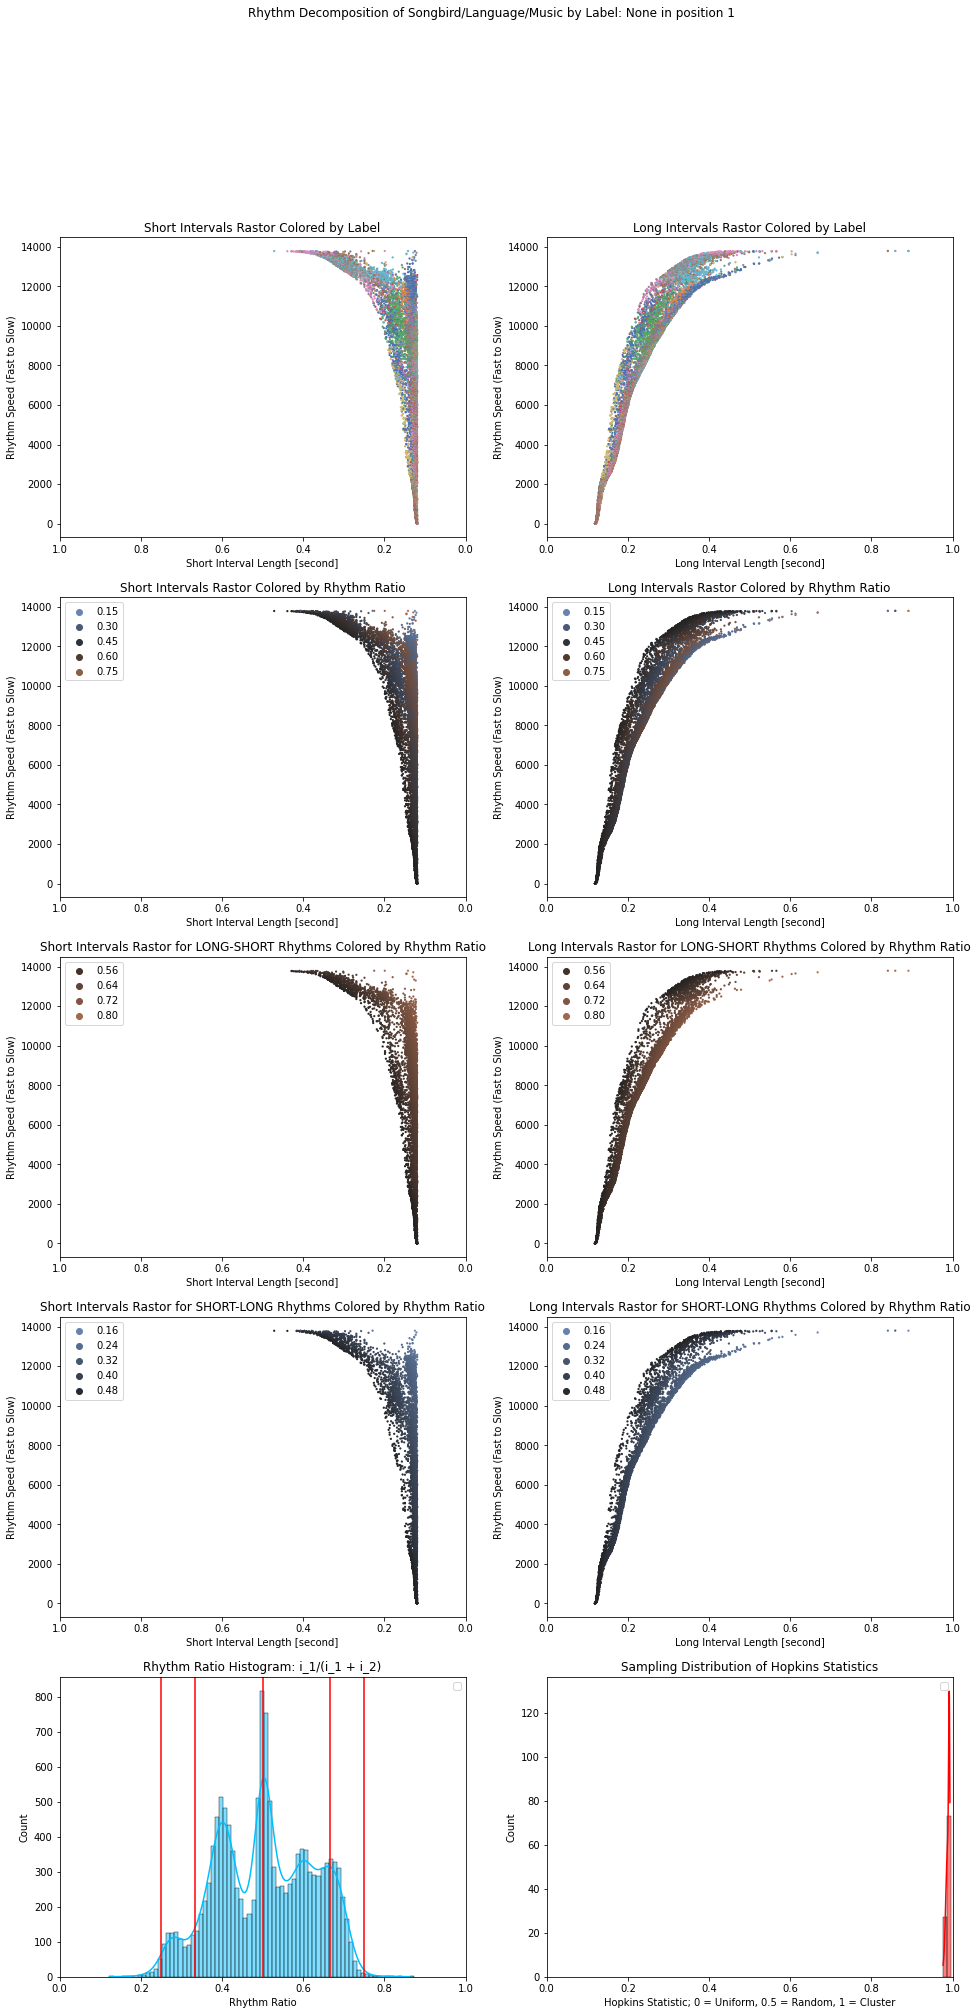

In [11]:
h = rhythm.decompose_rhythm(
    ## Macro controls
    dyadic, 
    label = None, 
    position = 1, 
    hopkins_iteration = 100,
    ## Graph controls
    figsize = (16, 32),
    xlim = (0, 1),
    s_interval = 's_interval',
    l_interval = 'l_interval', 
    cycle_rank = 'cycle_rank',
    marker = '.',
    color = 'black', 
    hue_norm = (0, 1),
    palette = 'deep',
    legend = False, 
    linewidth = 0,
    s = 20,
    s_ratio = 0.04,
    alpha = 1,
    alpha_ratio = 0.25,
    rhythm_ratio = 'ratio_roeske',
    binwidth = 0.01,
    kde = True
)

In [12]:
np.mean(h)

0.9890327248058014

## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [13]:
import numpy as np
import numpy.random as random
import seaborn as sns

In [14]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [15]:
interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
uni_ratio = interval1_uni / (interval1_uni + interval2_uni)

<AxesSubplot:ylabel='Count'>

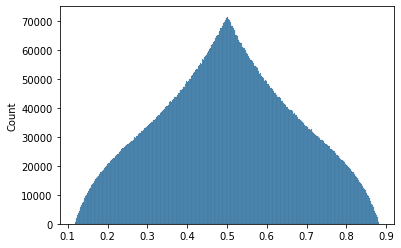

In [16]:
sns.histplot(uni_ratio)

## Calculate Shuffled IOI Rhythm
> Shuffled rhythm is calculated under the assumption that interval lengths are bootstrapped from the empirical distribution, but the consecutive order of intervals are shuffled. 

In [17]:
n = 1000

In [18]:
df_sf = []
for i in np.arange(0, n):
    interval1_sf = dyadic['intervals1'].sample(frac = 1, replace = True).values
    interval2_sf = dyadic['intervals2'].sample(frac = 1, replace = True).values
    df_sf.append(interval1_sf / (interval1_sf + interval2_sf))

In [19]:
sf_ratio = np.array(df_sf).flatten()

<AxesSubplot:ylabel='Count'>

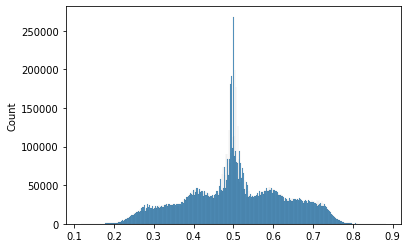

In [20]:
sns.histplot(sf_ratio)

## Calculate Shuffled Note + Gap
> Shuffled Note + Gap rhythm is calculated under the assumption that note length and inter-note gaps are independently shuffled.

In [21]:
import numpy.random as random

In [22]:
# find all gaps and their positions
grand_gaps = []

for phrase_nb in np.unique(note_df['phrase_nb']):
    ## pull out each phrase
    phrase = note_df[note_df['phrase_nb'] == phrase_nb]

        ## find all internote gaps
    gaps = phrase['note_strt'][1:].values - phrase['note_end'][:-1].values
    grand_gaps.append(gaps)
    
grand_gaps = np.hstack(grand_gaps)
grand_gaps = grand_gaps[grand_gaps < 10]
grand_gaps = grand_gaps[grand_gaps > 0]## gaps that are more than 10 seconds long are noise

In [23]:
df_lg = []

for i in np.arange(0, n):
    ## randomly shuffle gaps
    random.shuffle(grand_gaps)
    ## add to randomly shuffled lengths
    shuffled_lg = grand_gaps + np.mean(note_df['note_len'])
    
    shuffled_lg_i1 = shuffled_lg[:-1]
    shuffled_lg_i2 = shuffled_lg[1:]
    
    df_lg.append(shuffled_lg_i1 / (shuffled_lg_i1 + shuffled_lg_i2))

In [24]:
lg_ratio = np.hstack(df_lg)

<AxesSubplot:ylabel='Count'>

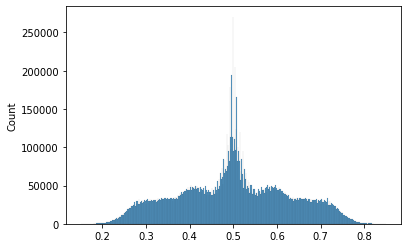

In [25]:
sns.histplot(lg_ratio)

## plot

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR
import seaborn as sns

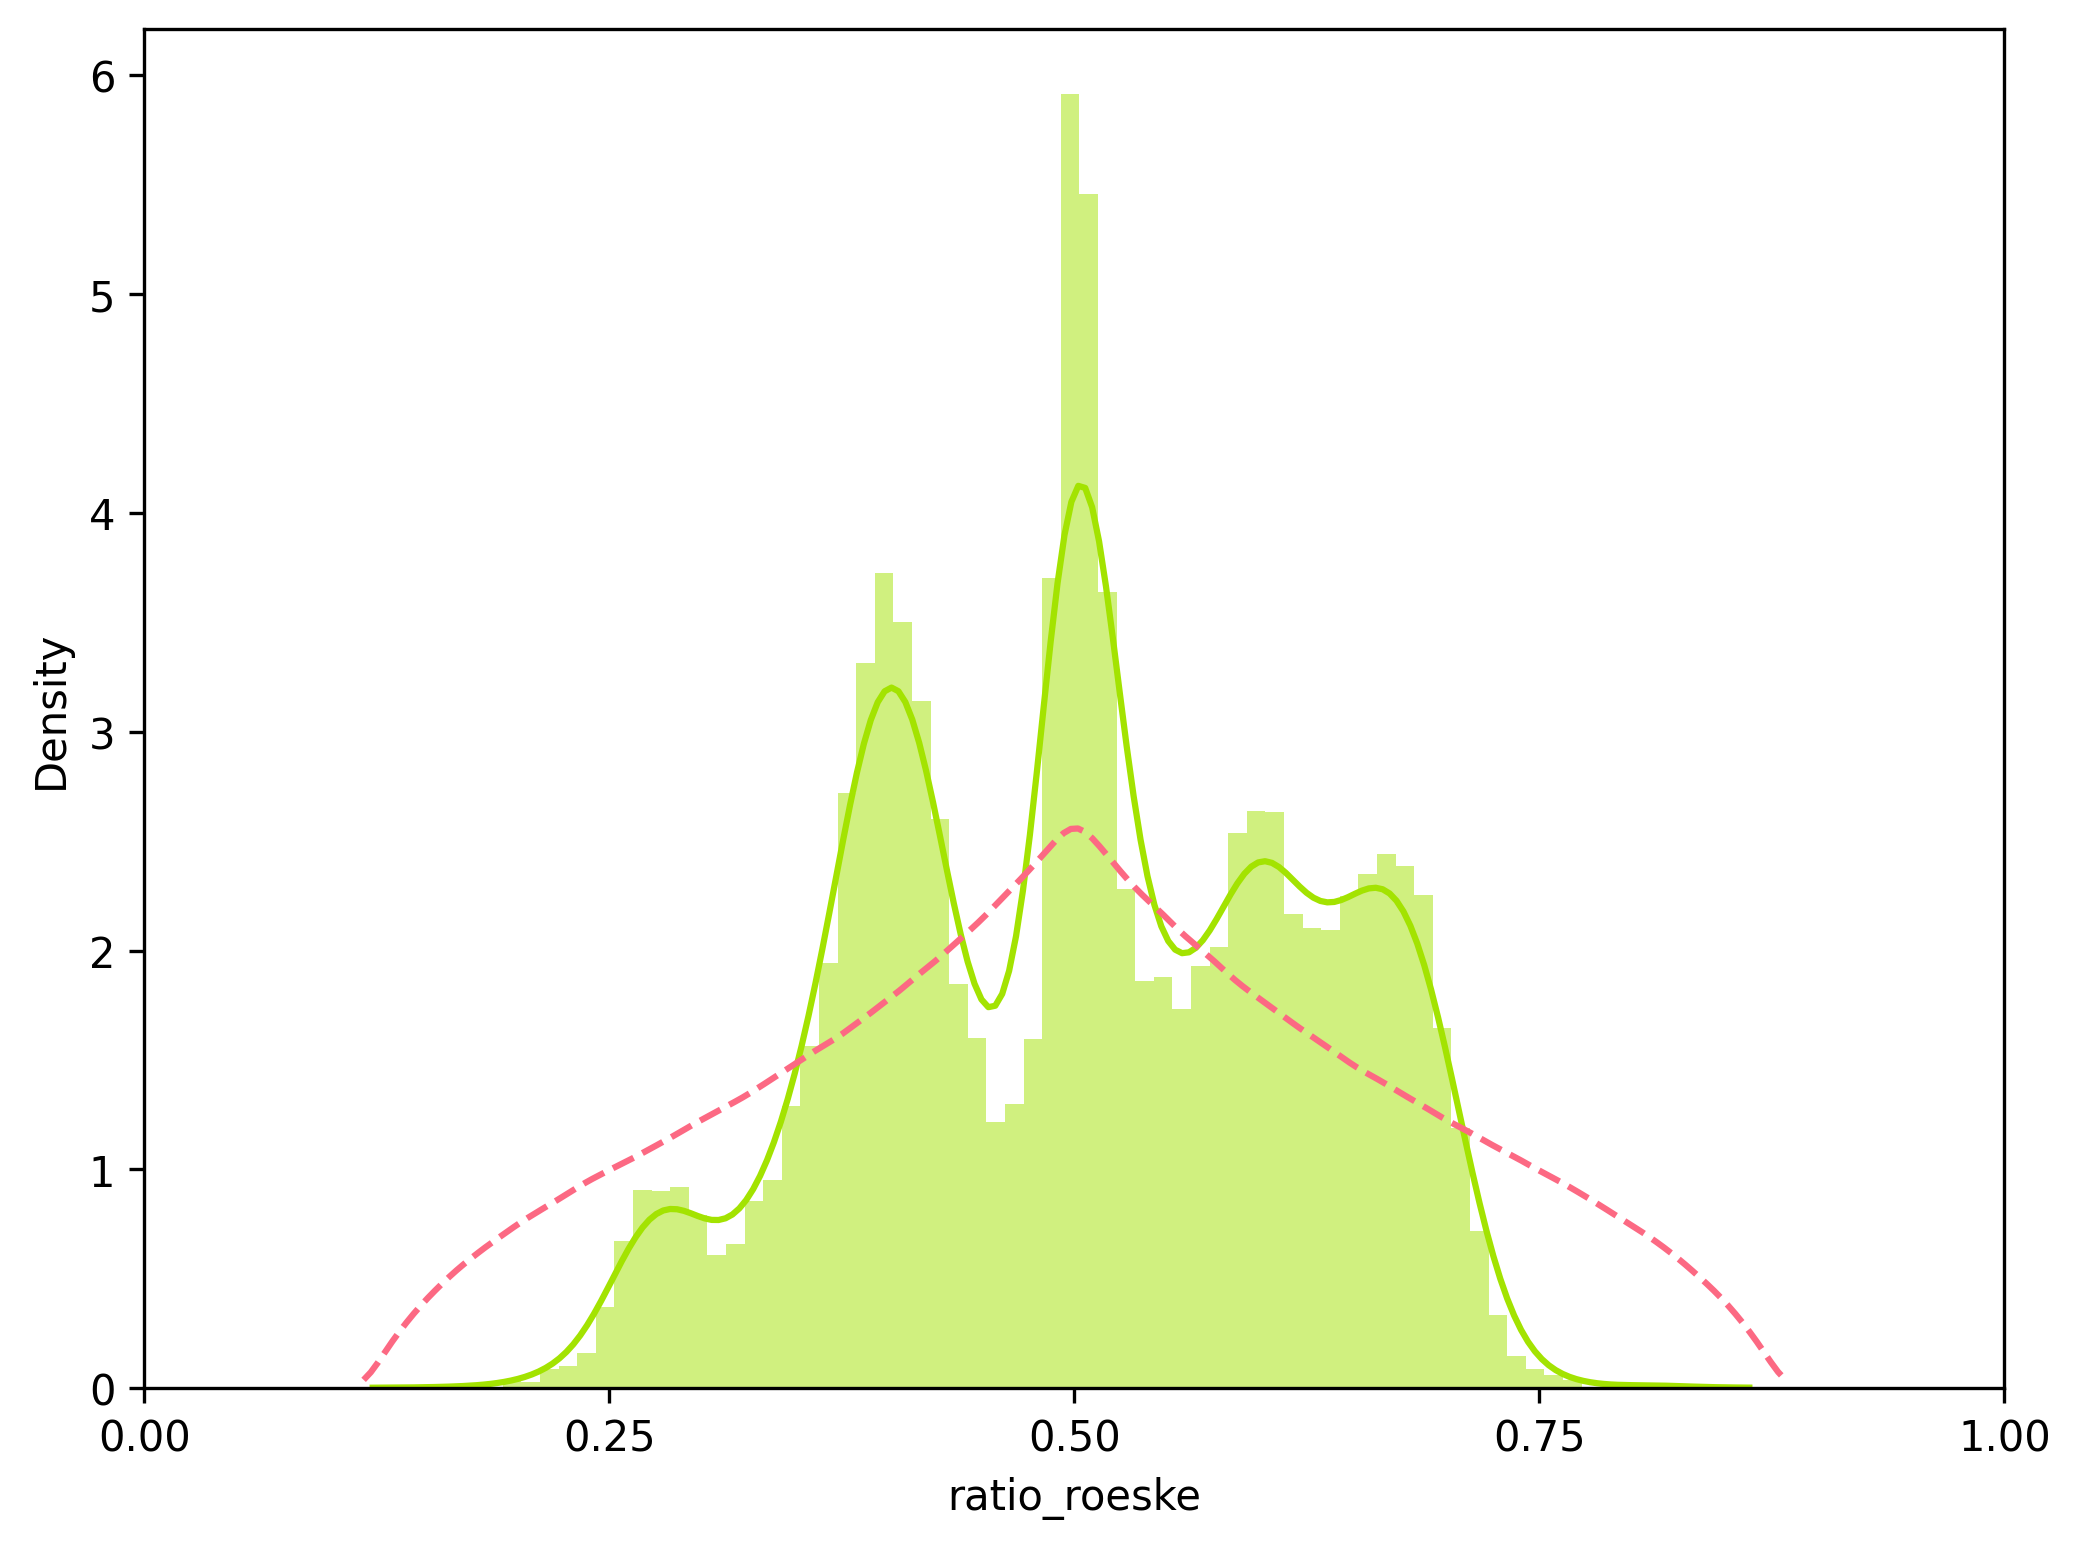

In [27]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    binwidth = 0.01,
    stat = 'density',
    color = '#A3E301',
    fill = '#A3E301',
    kde = True
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    binwidth = 0.01,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

'''sf = sns.histplot(
        x = sf_ratio,
        stat = 'density',
        alpha = 0,
        color = '#1DB6AB',
        kde = True,
        line_kws = dict(linestyle = 'dashed')
    )

lg = sns.histplot(
        x = lg_ratio,
        stat = 'density',
        alpha = 0,
        color = '#15215B',
        kde = True,
        line_kws = dict(linestyle = 'dashed')
)'''

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'lengthcontrol_rhythm_' + indv + '.pdf'
plt.savefig(FIGURE_DIR/'len_control'/indv/figname)

## Find Consistent Transitions (Copied from 3.1)

In [28]:
from butcherbird import sequential

In [29]:
import numpy as np

In [30]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

In [31]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [32]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
p_container

[array([0.0044843 , 0.0044843 , 0.        , ..., 0.04081633, 0.        ,
        0.        ]),
 array([0.01376147, 0.01376147, 0.00917431, ..., 0.        , 0.        ,
        0.        ]),
 array([0.01621622, 0.        , 0.01081081, ..., 0.02777778, 0.        ,
        0.        ]),
 array([0.01716738, 0.00858369, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.01369863, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.00961538, 0.        , 0.00961538, ..., 0.        , 0.03448276,
        0.        ]),
 array([0.02926829, 0.00487805, 0.        , ..., 0.02272727, 0.        ,
        0.        ]),
 array([0.01507538, 0.        , 0.01005025, ..., 0.        , 0.0212766 ,
        0.        ]),
 array([0.030837  , 0.00440529, 0.        , ..., 0.        , 0.        ,
        0.02857143]),
 array([0.01442308, 0.00961538, 0.00480769, ..., 0.02702703, 0.        ,
        0.        ]),
 array([0.00961538, 0.01442308, 0.00480769, ..., 0

In [33]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [34]:
p = np.swapaxes(p_container, 0, 1)

In [35]:
p

array([[0.0044843 , 0.01376147, 0.01621622, ..., 0.00809717, 0.01415094,
        0.01785714],
       [0.0044843 , 0.01376147, 0.        , ..., 0.00404858, 0.00471698,
        0.        ],
       [0.        , 0.00917431, 0.01081081, ..., 0.00809717, 0.00471698,
        0.00446429],
       ...,
       [0.04081633, 0.        , 0.02777778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [37]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
higherconfints

[0.013396896453583561,
 0.006950085108235224,
 0.0048782173613096235,
 0.01661246697750601,
 0.04300589626696809,
 0.029461646082605507,
 0.018166458803249144,
 0.008370328785235494,
 0.018056534663813833,
 0.0330626138447446,
 0.0016932306718853854,
 0.005601794061630519,
 0.0027251574583813764,
 0.005404883002521601,
 0.0010532265682404334,
 0.0007959354788953758,
 0.015255218305852653,
 0.004981654458195294,
 0.016028494832843944,
 0.016062379371991085,
 0.007088361664333456,
 0.016556694348224262,
 0.024875095113467242,
 0.05077858616877219,
 0.006305469148960678,
 0.004601869786466729,
 0.0026795586719527663,
 0.004742364515041565,
 0.005154309384128274,
 0.009161078872364333,
 0.008171096515813207,
 0.011437760726444045,
 0.01341661281839625,
 0.006149329294504864,
 0.022019475130737483,
 0.02805744382714788,
 0.01649469793787322,
 0.04491911283976227,
 0.019251734819328924,
 0.022523508631243694,
 0.028108964547677966,
 0.005995554162112219,
 0.030580114608445386,
 0.02806000752

In [38]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [39]:
trans_long

,songType,noteType,markov,p
0,True,0,0,0.004717
1,True,0,1,0.000000
2,True,0,2,0.000000
3,True,0,3,0.000000
4,True,0,4,0.080189
...,...,...,...,...
4220,True,64,60,0.000000
4221,True,64,61,0.000000
4222,True,64,62,0.000000
4223,True,64,63,0.000000


In [40]:
trans_long['higherconfint'] = higherconfints

In [41]:
trans_long

,songType,noteType,markov,p,higherconfint
0,True,0,0,0.004717,0.013397
1,True,0,1,0.000000,0.006950
2,True,0,2,0.000000,0.004878
3,True,0,3,0.000000,0.016612
4,True,0,4,0.080189,0.043006
...,...,...,...,...,...
4220,True,64,60,0.000000,0.006952
4221,True,64,61,0.000000,0.018172
4222,True,64,62,0.000000,0.013483
4223,True,64,63,0.000000,0.010048


In [42]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [43]:
filtered_trans_long

,songType,noteType,markov,p,higherconfint
4,True,0,4,0.080189,0.043006
18,True,0,18,0.179245,0.016028
25,True,0,25,0.009434,0.004602
33,True,0,33,0.396226,0.006149
39,True,0,39,0.080189,0.022524
...,...,...,...,...,...
4179,True,64,19,0.157895,0.018650
4188,True,64,28,0.026316,0.003927
4194,True,64,34,0.026316,0.020758
4197,True,64,37,0.105263,0.052042


In [44]:
ftl = filtered_trans_long

In [45]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [46]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.01*len(dyadic):
        verified.append(index)

In [47]:
vr = ftl.filter(items = verified, axis = 0)

In [48]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [49]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [50]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [51]:
eligible_transitions

,songType,noteType,markov,p,higherconfint
1544,True,23,49,0.282178,0.046105
1554,True,23,59,0.277228,0.046911
3219,True,49,34,0.403846,0.020338
3236,True,49,51,0.302564,0.015137
3383,True,52,3,0.355886,0.016257
3417,True,52,37,0.320704,0.044086
3813,True,58,43,0.191358,0.025671
3816,True,58,46,0.275463,0.025107


In [52]:
import scipy.stats
import itertools

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations
        destinations = np.unique(bif_df['markov'])
        pairs = list(itertools.combinations(destinations, 2))
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        for pair in pairs: 
            t1_df = note_df[note_df['label2'] == pair[0]]
            t2_df = note_df[note_df['label2'] == pair[1]]
            bif_prob0 = bif_df[bif_df['markov'] == pair[0]]['p'].values[0]
            bif_prob1 = bif_df[bif_df['markov'] == pair[1]]['p'].values[0]
            
            ### e. compute ks
            try:
                ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
            except:
                ks = [None, None]
                print('ks not computed')
            ### e. feeds out pandas
            output.append(
                pd.DataFrame(
                    {
                        'pre_bif': [note],
                        'bif_des': [(pair[0], pair[1])],
                        'bif_prof': [
                            (
                                bif_prob0,
                                bif_prob1
                            )
                        ],
                        'rhy_cnts': [
                            (
                                len(t1_df),
                                len(t2_df)
                            )
                        ],
                        'ks_statistic': [ks[0]],
                        'ks_p': [ks[1]]
                    }
                )
            )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [53]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

Finished querying bifurcation with pre_bif  23
Finished querying bifurcation with pre_bif  49
Finished querying bifurcation with pre_bif  52
Finished querying bifurcation with pre_bif  58


In [54]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.995516,4.246959e-132
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.564768,6.802222e-39
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.617034,3.054239e-43
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.388732,3.162994e-20


In [55]:
entangle['ks_p'] < 0.05

0    True
0    True
0    True
0    True
Name: ks_p, dtype: bool

In [56]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

Finished querying bifurcation with pre_bif  23
Finished querying bifurcation with pre_bif  49
Finished querying bifurcation with pre_bif  52
Finished querying bifurcation with pre_bif  58


In [57]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.052946,0.885226
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.049115,0.890794
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.105802,0.124462
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.060086,0.638553


# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [58]:
import scipy.stats as stats

In [59]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [60]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9093294057202229

## Find Baseline using bootstrap

In [61]:
from tqdm.autonotebook import tqdm

In [62]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

  0%|          | 0/100 [00:00<?, ?it/s]

In [63]:
mean_confidence_interval(SDoMSE, confidence=0.95)

(0.05337586247079893, 0.05293842635200682, 0.05381329858959104)

In [64]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9093294057202229

## try using anova

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
dyadic = dyadic.astype({'label1': str, 'label2': str})

In [67]:
model = ols('ratio_roeske ~ label1', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
label1,126.188447,61.0,427.571244,0.0
Residual,66.442611,13733.0,NaN,NaN


In [68]:
dyadic['transition'] = dyadic['label1'] + '+' + dyadic['label2']

In [69]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank,transition
9579,0.118994,0.118994,44,35,32,0.118994,0.118994,0.237989,0.500000,1.000000,6,44+35
6572,0.118994,0.118994,8,35,17,0.118994,0.118994,0.237989,0.500000,1.000000,6,8+35
1010,0.118994,0.118994,56,35,47,0.118994,0.118994,0.237989,0.500000,1.000000,6,56+35
3931,0.118994,0.118994,52,36,5,0.118994,0.118994,0.237989,0.500000,1.000000,6,52+36
3332,0.118994,0.118994,50,35,47,0.118994,0.118994,0.237989,0.500000,1.000000,6,50+35
...,...,...,...,...,...,...,...,...,...,...,...,...
12317,0.891355,0.141711,31,7,19,0.141711,0.891355,1.033066,0.862825,0.158984,13791,31+7
8825,0.858994,0.198994,38,4,42,0.198994,0.858994,1.057989,0.811913,0.231660,13792,38+4
5972,0.840717,0.225005,29,9,35,0.225005,0.840717,1.065722,0.788871,0.267634,13793,29+9
5971,0.228945,0.840717,58,29,9,0.228945,0.840717,1.069663,0.214035,0.272322,13794,58+29


In [70]:
model = ols('ratio_roeske ~ transition', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
transition,175.165085,743.0,176.160993,0.0
Residual,17.465972,13051.0,NaN,NaN
